## __Hotel booking demand__

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This data set contains booking information for a **city hotel** and a **resort hotel**, and includes information such as **when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import sort_dataframeby_monthorweek as sd
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Loading the file that contains the Hotel booking data
df = pd.DataFrame()

In [29]:
df = pd.read_csv('hotel_bookings.csv')

In [57]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0


In [31]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [32]:
# Viewing the types and null values of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [33]:
# Checking memory usage
df.memory_usage()

Index                                132
hotel                             955120
is_canceled                       955120
lead_time                         955120
arrival_date_year                 955120
arrival_date_month                955120
arrival_date_week_number          955120
arrival_date_day_of_month         955120
stays_in_weekend_nights           955120
stays_in_week_nights              955120
adults                            955120
children                          955120
babies                            955120
meal                              955120
country                           955120
market_segment                    955120
distribution_channel              955120
is_repeated_guest                 955120
previous_cancellations            955120
previous_bookings_not_canceled    955120
reserved_room_type                955120
assigned_room_type                955120
booking_changes                   955120
deposit_type                      955120
agent           

In [34]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**1.Data Wrangling**

In [35]:
# Checking for null Values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can conclude from this table that there are null values in the table which are:***Children,Country,Agent and Company***

In [36]:
# filling the null values
replacement = {"children:": 0,"country": "Unknown", "agent": 0, "company": 0}
newdata = df.fillna(replacement,inplace = True)

We will replace the missing values as follow:
**Children**: If no children is given, booking was most likely made **without them**
**Country**: If no Country is given, booking will be made **Unknown**
**Agent**: If no agency is given, booking was most likely made **without one**
**Company**: If none given, it was most likely **private**

In [37]:
#There is "Undefined" in meal colunm
df["meal"].replace("Undefined", "HS", inplace=True)

**Undefined** was found in the **meal** colunm, so it will fill with **HS** which stands for **Hotel Special**

In [38]:
#if adults=0, children=0 and babies=0 means there is no guests
zero_guests = list(df.loc[df["adults"] + df["children"] + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

In [39]:
# combine the babies and children together as one column "kids"
df['kids'] = df['babies'].add(df['children'])

**2 Analyzing the data and visualize it**

In [40]:
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

We separate **Resort and City hotel** to useit if needed, 
Also to know the acutal visitor numbers, **only the conforem bookings that were included**. 

**Q1: where the most guests coming from?**

In [41]:
guestscountries = df[df['is_canceled'] == 0]['country'].value_counts()
guestscountries.columns = ['country', 'No of guests']
guestscountries

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [42]:
worldmap = folium.Map()
guests_map = px.choropleth(guestscountries, locations = guestscountries['country'],
                           color = guestscountries['No of guests'], hover_name = guestscountries['country'])
guests_map.show()

The map above shows the most guests are from **PRT** which stands for **Portugal** and other countries in Europe.

**Q2: What the state of the bookings confirmed(0) or canceled(1)?**


In [43]:
print('The total Bookings confirmed(0) and canceled(1):')
print("-" *60)
print(df['is_canceled'].value_counts())

The total Bookings confirmed(0) and canceled(1):
------------------------------------------------------------
is_canceled
0    75011
1    44199
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1c780c9bfd0>,
 [Text(-0.4344324524289326, 1.010578272216746, 'Conformed booking'),
  Text(0.4344324524289329, -1.0105782722167458, 'Canceled booking')],
 [Text(-0.23696315587032685, 0.551224512118225, '63%'),
  Text(0.236963155870327, -0.551224512118225, '37%')])

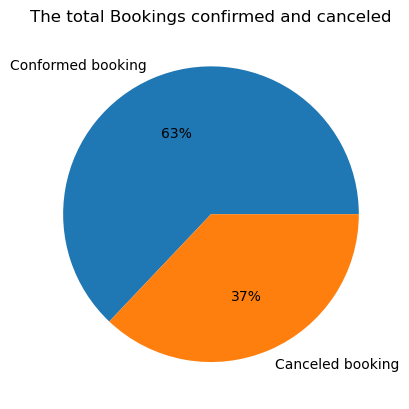

In [44]:
counts = df['is_canceled'].value_counts()
plt.title('The total Bookings confirmed and canceled')
labels= ['Conformed booking','Canceled booking' ]
plt.pie(counts, labels=labels, autopct='%1.f%%')

The figure above shows The total Bookings whether they were Confirmed or canceled and the **canceled Bookings** are less than the Confirmed ones.

**Q3: What the busiest months based on the number of bookings?**

In [45]:
busy_months = df['arrival_date_month'].value_counts().reset_index()
busy_months.columns = ['month', 'number_of_bookings']
busy_months = busy_months.sort_values(by='number_of_bookings', ascending=False)
print("The busiest months based on the number of bookings:")
print("-" *60)
print(busy_months)

The busiest months based on the number of bookings:
------------------------------------------------------------
        month  number_of_bookings
0      August               13861
1        July               12644
2         May               11780
3     October               11147
4       April               11078
5        June               10929
6   September               10500
7       March                9768
8    February                8052
9    November                6771
10   December                6759
11    January                5921


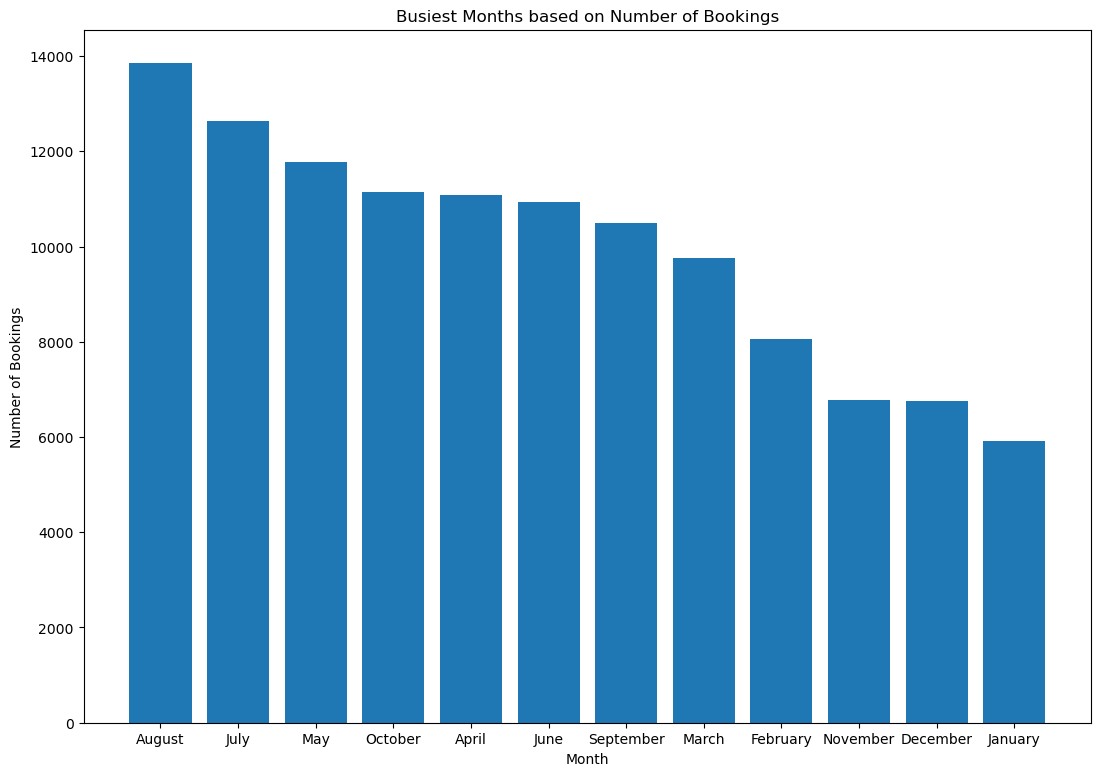

In [46]:
plt.figure(figsize=(13, 9))
plt.bar(busy_months['month'], busy_months['number_of_bookings'])
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Busiest Months based on Number of Bookings')
plt.show()

**Q4: How many stays in Weekend Nights vs Week Nights?**

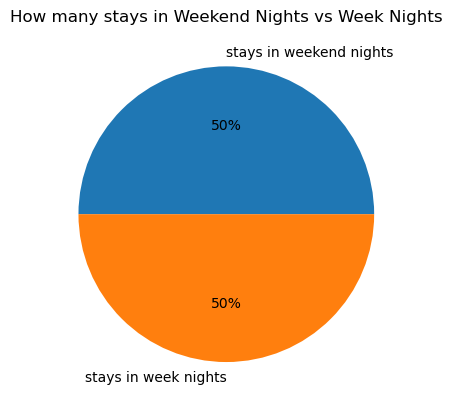

In [47]:
weekend = df['stays_in_weekend_nights'].value_counts()
weekday = df['stays_in_week_nights'].value_counts()
labels = ['stays in weekend nights', 'stays in week nights']
plt.pie([weekend.sum(), weekday.sum()], labels=labels, autopct='%1.f%%')
plt.title('How many stays in Weekend Nights vs Week Nights')
plt.show()

**Q5: What is the distribution of Adults and Kids?**

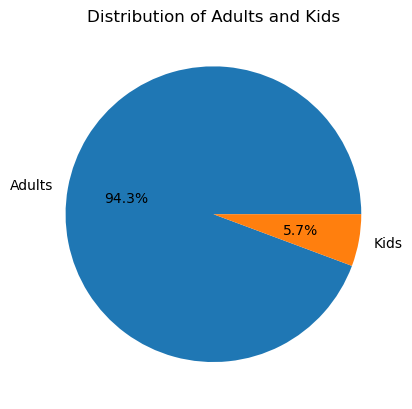

In [48]:
counts = [df['adults'].sum(), df['kids'].sum()]
labels = ['Adults', 'Kids']

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Adults and Kids')
plt.show()

In [56]:
# Calculate adr_pp for each subset
rh.loc[:, "adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch.loc[:, "adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

print("Resort Hotel:")
print(rh.head())
print("-"*60)
print("City Hotel:")
print(ch.head())

Resort Hotel:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1 

**Q6: How much do guests pay for a room per night? (based on the hotel type)**

In [50]:
print('The average prices are:')
print('Resort hotel: {:.2f} € per night'.format(rh["adr_pp"].mean()))
print('City hotel: {:.2f} € per night'.format(ch["adr_pp"].mean()))

The average prices are:
Resort hotel: 47.49 € per night
City hotel: 59.27 € per night
